In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.0.0-rc1'

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

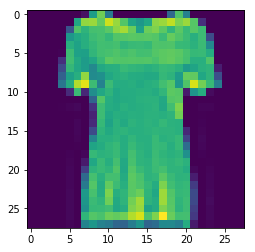

In [6]:
plt.imshow(X_train_full[10])

In [7]:
y_train_full[10]

0

X is entry data to be classified
y is the actual classification to assert against prediction

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train_full[10]]

'T-shirt/top'

In [10]:
class_names[y_train_full[0]]

'Ankle boot'

In [11]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

### Data Normalization

We need to normalize so all the values remain on the same scale -> i.e. 0-1

In [12]:
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0

### Splitting the data into train/validation and test datasets

In [13]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [14]:
X_valid[10][15]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01568627, 0.        , 0.22352941, 0.65098039,
       0.60784314, 0.64313725, 0.65098039, 0.63137255, 0.63137255,
       0.64313725, 0.65490196, 0.64705882, 0.64705882, 0.63529412,
       0.10980392, 0.        , 0.01176471, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

### Create model architecture

We will use a sequential API for now (and leave the more complex functional API for a more complex model later on)

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # Flatten the 28x28 pixel array into 1, 784 array for input layer
model.add(keras.layers.Dense(300, activation="relu")) # 300 neuros, relu activation in hidden layer 1
model.add(keras.layers.Dense(100, activation="relu")) # 100 neuros, relu activation in hidden layer 2
# 10 neurons => since 10 output classifcations, softmax in output layer since exclusive classification model
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
model.summary() # None -> no limit on input data

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


* In layer 1 -> 784 outputs into 300 neurons (therefore 784 * 300 = 235200 weights, and 300 individual biases
* In layer 2 -> 300 outputs into 100 neurons (therefore 300 * 100 = 30000 weights, and 100 individual biases
* In output layer -> 100 outputs into 10 neurons (therefore 100 * 10 = 1000 weights, and 10 individual biases

Therefore a total of 235200 + 300 + 30000 + 100 + 1000 + 10 = 266 610 trainable parameters

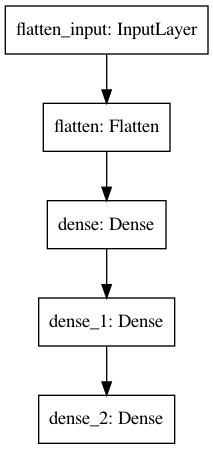

In [18]:
import pydot
import graphviz
keras.utils.plot_model(model)

In [19]:
weights, biases = model.layers[1].get_weights()

In [20]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

### Training the model

In [25]:
# loss (error function) -> categorical crossentropy because we are categorizing data in many places
# optimizer -> "sgd" (stochastic gradient descent) - i.e. do single record training -> and do back propogation
# metrics -> since we are categorizing we need to list this as accuracy
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Fit Data to model

* Recall: Epoch is going through 1 round of Sgd on all data

In [28]:
# Node default epochs is 1
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3421 - accuracy: 0.8783 - val_loss: 0.3541 - val_accuracy: 0.8730
Epoch 2/30
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3320 - accuracy: 0.8821 - val_loss: 0.3432 - val_accuracy: 0.8778
Epoch 3/30
55000/55000 [==============================] - 6s 112us/sample - loss: 0.3228 - accuracy: 0.8845 - val_loss: 0.3351 - val_accuracy: 0.8798
Epoch 4/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.3158 - accuracy: 0.8876 - val_loss: 0.3326 - val_accuracy: 0.8798
Epoch 5/30
55000/55000 [==============================] - 7s 124us/sample - loss: 0.3085 - accuracy: 0.8902 - val_loss: 0.3318 - val_accuracy: 0.8836
Epoch 6/30
55000/55000 [==============================] - 6s 118us/sample - loss: 0.3017 - accuracy: 0.8922 - val_loss: 0.3222 - val_accuracy: 0.8878
Epoch 7/30
55000/55000 [===========================

In [29]:
model_history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [31]:
model_history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [33]:
model_history.history # most important

{'loss': [0.34211937054070557,
  0.3320078971190886,
  0.32278248578418384,
  0.31579519163695247,
  0.3085403609839353,
  0.30166533263596623,
  0.2958690247763287,
  0.28907564646330747,
  0.2831510883439671,
  0.2777651707432487,
  0.27311509049155497,
  0.26825709647698837,
  0.2628244616855275,
  0.25844031049988486,
  0.2537223375818946,
  0.24877688900774175,
  0.24414296874349767,
  0.2396536237001419,
  0.23644363406571475,
  0.23282213847853922,
  0.22843382319537076,
  0.22488175870288502,
  0.22242254114801233,
  0.2171818808252161,
  0.21442110046039928,
  0.21043758959878575,
  0.20653393756909805,
  0.2044165914730592,
  0.20089298840436068,
  0.19764496514905583],
 'accuracy': [0.87832725,
  0.8821091,
  0.8844909,
  0.88756365,
  0.8902,
  0.8922182,
  0.89289093,
  0.8958,
  0.8991455,
  0.9001455,
  0.90132725,
  0.9031091,
  0.9047818,
  0.90723634,
  0.9085091,
  0.9098727,
  0.91254544,
  0.9145091,
  0.9144727,
  0.9155273,
  0.9178909,
  0.91858184,
  0.92136365

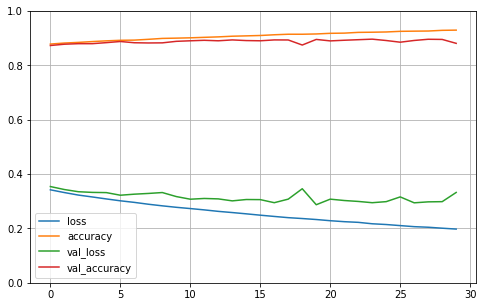

In [34]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [36]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.36815980948209764, 0.8689]

We have the second metric as accuracy -> as that is what we defined the model metric to be -> 0.8689 accuracy is pretty good!

### Predicting New Data

In [37]:
X_new = X_test[:3]

In [39]:
# Calculate probability score assigned to each class for each of the 3 test records
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
# Predict class for each of the 3 test records
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


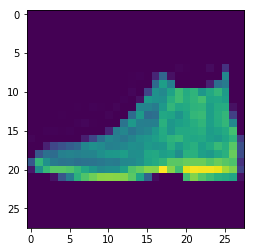

In [42]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


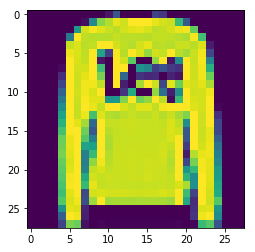

In [43]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


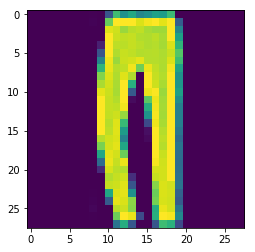

In [44]:
print(plt.imshow(X_test[2]))